# Bayesian hypothesis testing

## Are Melbourne temperatures rising?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(16, 9)

In [2]:
melb_temp = pd.read_csv('/data/melbourne-temp.csv')

FileNotFoundError: File b'/data/melbourne-temp.csv' does not exist

In [68]:
melb_temp

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality
0,IDCJAC0002,86351,1979,9,16.1,Y
1,IDCJAC0002,86351,1979,10,19.2,Y
2,IDCJAC0002,86351,1979,11,22.3,Y
3,IDCJAC0002,86351,1979,12,26.8,Y
4,IDCJAC0002,86351,1980,1,24.7,Y
5,IDCJAC0002,86351,1980,2,25.8,Y
6,IDCJAC0002,86351,1980,3,23.5,Y
7,IDCJAC0002,86351,1980,4,22.1,Y
8,IDCJAC0002,86351,1980,5,17.8,Y
9,IDCJAC0002,86351,1980,6,13.4,Y


In [69]:
melb_temp['Decimal date'] = melb_temp['Year'] + (melb_temp['Month'] - 1) / 12

In [70]:
t = melb_temp[['Decimal date', 'Mean maximum temperature (°C)']].set_index('Decimal date')

In [60]:
%matplotlib inline

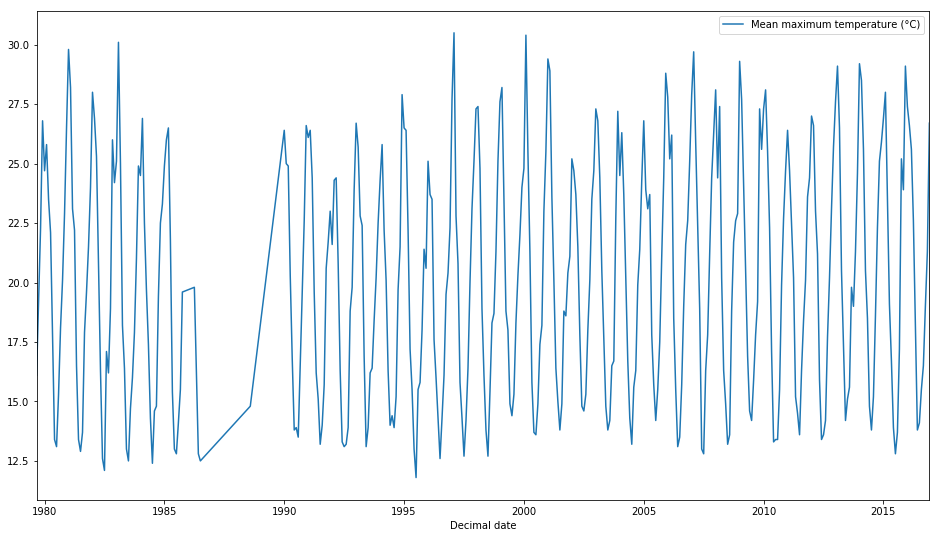

In [71]:
t.plot()

In [13]:
t.loc[1985:1991]

,Mean maximum temperature (°C)
Decimal date,
1985.000000,24.9
1985.083333,26.0
1985.166667,26.5
1985.250000,21.8
1985.333333,15.4
1985.416667,13.0
1985.500000,12.8
1985.583333,14.1
1985.666667,15.5


Let's model the temperature as having a cyclic component (12-monthly cycle), with unknown offset, and a linear trend, whose slope is unknown.

$$
y = a t + b + c \space sin(2 \pi [t + d]) + \epsilon
$$

In [17]:
import pymc3 as pm
import numpy as np

In [43]:
with pm.Model() as model2:
    sigma = pm.Uniform('sigma', 0, 15)
    
    a = pm.Uniform('a', -0.1, 0.1)
    b = pm.Uniform('b', 10, 35)
    c = pm.Uniform('c', 10, 15)   # half difference between summer and winter temperature: 10 and 35, say
    d = pm.Uniform('d', 0, 0.2)   # peak summer is somewhere between Jan 01 and end of Feb

    times = np.array(t.index)
    y = pm.Normal('y', a * times + b + c * pm.math.sin(2 * np.pi * (times + d)), sigma,
                  observed=t.values)

In [46]:
with model:
    trace = pm.sample(1000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 1.2691e+06:   3%|▎         | 5628/200000 [00:12<07:04, 458.09it/s]**OUTPUT MUTED**

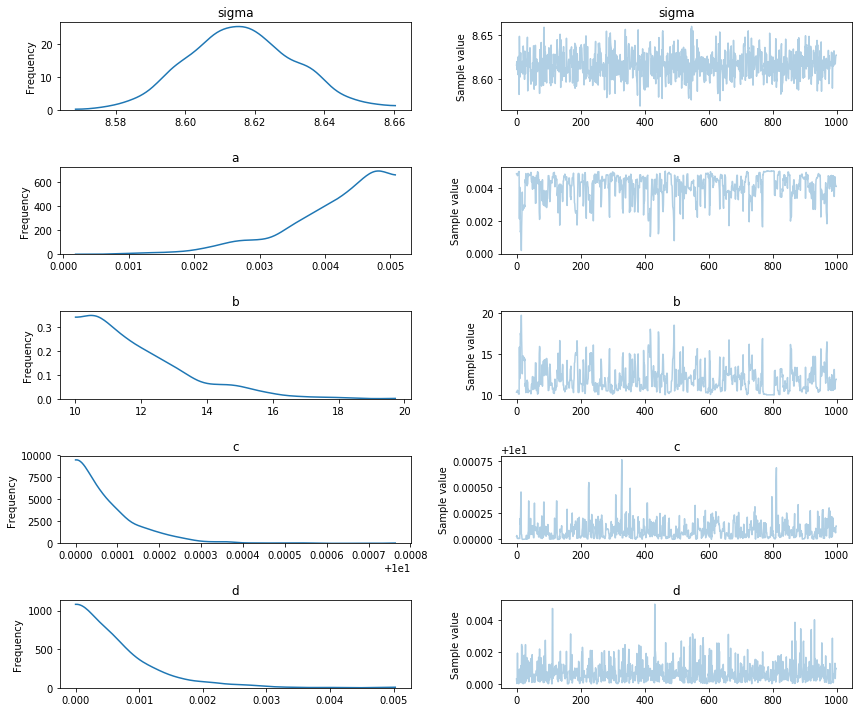

In [48]:
pm.traceplot(trace);

In [51]:
a_samples = trace['a']
b_samples = trace['b']
c_samples = trace['c']
d_samples = trace['d']
sigma_samples = trace['sigma']

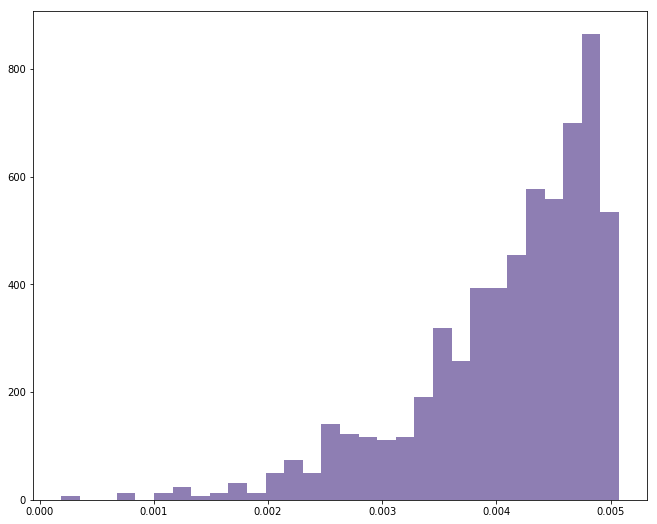

In [50]:
plt.hist(a_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $a$", color="#7A68A6", normed=True);

What is the probability that the mean temperature is rising, i.e. $a > 0$?